In [1]:
import pandas as pd
import sys

infile='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/tieredApproach/BL22_groupv2/NK/NK_thresholdpos_allthresholdcombinations_subset_stat.txt'#'/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/CD8TIL_CD8PBL_meltumor/deltaCD8tilCD8pbl_thresholdpos_allthresholdcombinations_subset_only4pos_stat.txt' #'/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/tieredApproach/BL22_groupv2/em4_cm4/cm4_thresholdpos_allthresholdcombinations_Shoonhsin_avg_and_linecount.txt' #
owngroup='Tcell'  #'mel'
celltype='NK'   #'CD8TIL'

minimumTOTALcpg=250
distancefromothergroup=0.5


owngroupcelltype=owngroup+celltype


indf=pd.read_csv(infile,sep='\t')
indf.head()

,Filename,Average Value,Line Count
0,g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_BcellNK_-0....,0.55,6013
1,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.55,1022
2,g1_NK_g2_TcellNK_-0.2_int_g1_NK_g2_BcellNK_-0....,0.50,7551
3,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.60,1185
4,g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_BcellNK_-0....,0.30,33433


In [2]:
indf['other_group']=-999
indf['other_group_sum']=-999  ##############
indf['own_group']=-999

indf.head()

,Filename,Average Value,Line Count,other_group,other_group_sum,own_group
0,g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_BcellNK_-0....,0.55,6013,-999,-999,-999
1,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.55,1022,-999,-999,-999
2,g1_NK_g2_TcellNK_-0.2_int_g1_NK_g2_BcellNK_-0....,0.50,7551,-999,-999,-999
3,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.60,1185,-999,-999,-999
4,g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_BcellNK_-0....,0.30,33433,-999,-999,-999


In [3]:
def calculateOtherVSowngroup(fname):
    split_lst = fname.split("_")
    total = 0
    n = 0
    
    nums = [str(i) for i in list(range(0, 10))]
    
    prev='garbage'
    
    owngroupdelta=-999
    
    for split in split_lst:
        
        if "-" in split and split[-1] in nums: # confirm that the substring is a negative number
            
            if owngroupcelltype in prev:
                
                owngroupdelta=abs(float(split))
            
            else:
            
                n += 1
                total += float(split)
        else:
            prev=split
            
            
   
    avgs=abs(total / n)
    
    
    return avgs,owngroupdelta,abs(total)

In [4]:
for index, row in indf.iterrows():
    r1,r2,r3=calculateOtherVSowngroup(row['Filename'])
    
    
    indf.iloc[index,indf.columns.get_loc('other_group')]=r1
    
    indf.iloc[index,indf.columns.get_loc('own_group')]=r2
    
    indf.iloc[index,indf.columns.get_loc('other_group_sum')]=r3
    
    

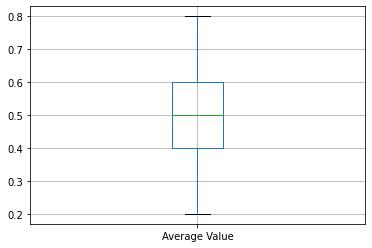

In [5]:
indf.boxplot(column=['Average Value'])

In [6]:
indf[indf['Filename']=='CD8TIL_CD8patientPBLCD8TIL_-0.6_int_CD8TIL_melCD8TIL_-0.2']

,Filename,Average Value,Line Count,other_group,other_group_sum,own_group


In [7]:
indf[indf['other_group']>distancefromothergroup].shape

(128, 6)

In [8]:
try1=indf[(indf['Line Count']>minimumTOTALcpg) & (indf['other_group']>distancefromothergroup)]
print(try1.shape)
percentile75=try1['Average Value'].quantile(0.75)
percentile75

(128, 6)


0.6499999999999999

In [9]:
outdfstep1=try1[try1['Average Value']>=percentile75]

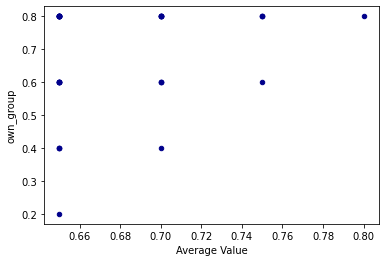

In [10]:
outdfstep1.plot.scatter(x='Average Value',y='own_group',c='DarkBlue')

In [17]:
outdfstep1[(outdfstep1['Average Value']>=0.8) & (outdfstep1['own_group']>=0.4)]['Filename'].tolist()

['g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8']

In [12]:
outdfstep1[(outdfstep1['Average Value']>=0.64) ]['Filename'].tolist()

['g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.2_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.6_int_g1_NK_g2_PMNlikeNK_-0.6',
 'g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.6_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.4_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.4_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.6',
 'g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.4_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0.6_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.6',
 'g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0.6_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_

In [13]:
outdfstep1

,Filename,Average Value,Line Count,other_group,other_group_sum,own_group
6,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.65,1010,0.600000,1.8,0.8
15,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.70,918,0.666667,2.0,0.8
22,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.75,760,0.733333,2.2,0.8
34,g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0....,0.65,2527,0.666667,2.0,0.6
38,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.65,1162,0.600000,1.8,0.8
48,g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0....,0.70,988,0.666667,2.0,0.8
51,g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0....,0.65,4830,0.666667,2.0,0.6
53,g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0....,0.70,3753,0.733333,2.2,0.6
55,g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_BcellNK_-0....,0.70,3094,0.800000,2.4,0.4
60,g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_BcellNK_-0....,0.65,3749,0.733333,2.2,0.4


In [14]:
outdfstep1['Filename'].tolist()

['g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.2_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.6_int_g1_NK_g2_PMNlikeNK_-0.6',
 'g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.6_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.4_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.4_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.6',
 'g1_NK_g2_TcellNK_-0.8_int_g1_NK_g2_BcellNK_-0.4_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0.6_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.6',
 'g1_NK_g2_TcellNK_-0.6_int_g1_NK_g2_BcellNK_-0.6_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_BcellNK_-0.8_int_g1_NK_g2_MyloidNK_-0.8_int_g1_NK_g2_PMNlikeNK_-0.8',
 'g1_NK_g2_TcellNK_-0.4_int_g1_NK_g2_

In [15]:
len(outdfstep1['Filename'].tolist())

35

In [16]:
#outdfstep1.to_csv(infile+"_st1.txt",sep='\t',index=False)